In [356]:
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, Aer, IBMQ,assemble
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
from qiskit.providers.aer import noise

#import python stuff
import matplotlib.pyplot as plt
import numpy as np
import time
# Set devices, if using a real device
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
quito = provider.get_backend('ibmq_quito')
manila = provider.get_backend('ibmq_manila')
qiskit.__qiskit_version__

ibmqfactory.load_account:WARNING:2022-05-02 03:10:16,199: Credentials are already in use. The existing account in the session will be replaced.


{'qiskit-terra': '0.20.1', 'qiskit-aer': '0.10.4', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.19.1', 'qiskit-aqua': None, 'qiskit': '0.36.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

# For Three Qubits
We create state that
$|\psi\rangle = \frac{1}{\sqrt{2}} (|000\rangle +i|111\rangle)
$


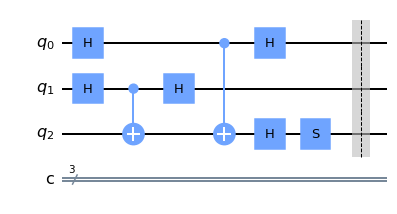

In [325]:
#create state 1/sqrt(2)*(|000>+i|111>)
q1 = QuantumRegister(3,'q')
c1 = ClassicalRegister(3,'c')
circuit = QuantumCircuit(q1, c1)
circuit.h(q1[0])
circuit.h(q1[1])
circuit.cx(q1[1],q1[2])
circuit.h(q1[1])
circuit.cx(q1[0],q1[2])
circuit.h(q1[0])
circuit.h(q1[2])
circuit.s(q1[2])
circuit.barrier()
circuit.draw(output='mpl')

# For Four Qubits
We create state that
$|\psi\rangle = \frac{1}{\sqrt{2}} (|0000\rangle +i|1111\rangle)
$

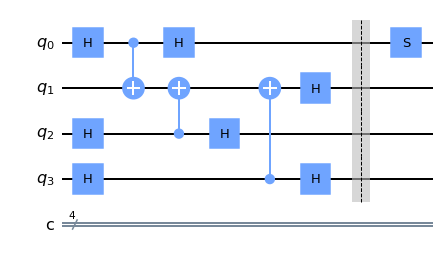

In [326]:
q2 = QuantumRegister(4, 'q')
c2 = ClassicalRegister(4, 'c')
circuit2 = QuantumCircuit(q2, c2)
circuit2.h(q2[0])
circuit2.h(q2[2])
circuit2.h(q2[3])
circuit2.cx(q2[0], q2[1])
circuit2.h(q2[0])
circuit2.cx(q2[2], q2[1])
circuit2.h(q2[2])
circuit2.cx(q2[3], q2[1])
circuit2.h(q2[1])
circuit2.h(q2[3])
circuit2.barrier()
circuit2.s(q2[0])
circuit2.draw(output='mpl')

# For Five Qubits
We create state that
$|\psi\rangle = \frac{1}{\sqrt{2}} (|00000\rangle +i|11111\rangle)
$

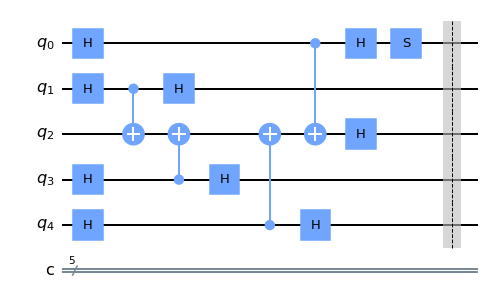

In [327]:
q3 = QuantumRegister(5, 'q')
c3 = ClassicalRegister(5, 'c')
circuit3 = QuantumCircuit(q3, c3)
circuit3.h(q3[0])
circuit3.h(q3[1])
circuit3.h(q3[3])
circuit3.h(q3[4])
circuit3.cx(q3[1], q3[2])
circuit3.h(q3[1])
circuit3.cx(q3[3], q3[2])
circuit3.h(q3[3])
circuit3.cx(q3[4], q3[2])
circuit3.cx(q3[0], q3[2])
circuit3.h(q3[4])
circuit3.h(q3[0])
circuit3.h(q3[2])
circuit3.s(q3[0])
circuit3.barrier()
circuit3.draw(output='mpl')

In [328]:
def measure_state(name,q,c,circuit):
    measurename = QuantumCircuit(q,c)
    state = 0
    for i in name:
        if i == 'X':
            measurename.h(q[state])
        elif i == 'Y':
            measurename.sdg(q[state])
            measurename.h(q[state])
        state += 1
    for i in range(state):
        measurename.measure(q[i],c[i])

    circuitname = circuit+measurename
    return circuitname


In [329]:
states_three = ['000','001','010','011','100','101','110','111']
circuitYXX= measure_state('YXX',q1,c1,circuit)
circuitXYX= measure_state('XYX',q1,c1,circuit)
circuitXXY= measure_state('XXY',q1,c1,circuit)
circuitYYY= measure_state('YYY',q1,c1,circuit)

circuits = [circuitYXX,circuitXYX,circuitXXY,circuitYYY]


/tmp/ipykernel_2820/3962558020.py:14: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circuitname = circuit+measurename


In [330]:
states_four = ['0000','0001','0010','0011','0100','0101','0110','0111','1000','1001','1010','1011','1100','1101','1110','1111',]
circuit2YXXX = measure_state('YXXX',q2,c2,circuit2)
circuit2XYXX = measure_state('XYXX',q2,c2,circuit2)
circuit2XXYX = measure_state('XXYX',q2,c2,circuit2)
circuit2XXXY = measure_state('XXXY',q2,c2,circuit2)

circuit2YYYX = measure_state('YYYX',q2,c2,circuit2)
circuit2YYXY = measure_state('YYXY',q2,c2,circuit2)
circuit2YXYY = measure_state('YXYY',q2,c2,circuit2)
circuit2XYYY = measure_state('XYYY',q2,c2,circuit2)

circuits2 = [circuit2XXXY,circuit2XYXX,circuit2XXYX,circuit2YXXX,circuit2XYYY,circuit2YXYY,circuit2YYXY,circuit2YYYX]


/tmp/ipykernel_2820/3962558020.py:14: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circuitname = circuit+measurename


In [331]:
states_five = ['00000','00001','00010','00011','00100','00101','00110','00111','01000','01001','01010','01011','01100','01101','01110','01111','10000','10001','10010','10011','10100','10101','10110','10111','11000','11001','11010','11011','11100','11101','11110','11111']
circuit3YXXXX = measure_state('YXXXX',q3,c3,circuit3)
circuit3XYXXX = measure_state('XYXXX',q3,c3,circuit3)
circuit3XXYXX = measure_state('XXYXX',q3,c3,circuit3)
circuit3XXXYX = measure_state('XXXYX',q3,c3,circuit3)
circuit3XXXXY = measure_state('XXXXY',q3,c3,circuit3)

circuit3YYYXX = measure_state('YYYXX',q3,c3,circuit3)
circuit3YYXYX = measure_state('YYXYX',q3,c3,circuit3)
circuit3YXYYX = measure_state('YXYYX',q3,c3,circuit3)
circuit3XYYYX = measure_state('XYYYX',q3,c3,circuit3)
circuit3YYXXY = measure_state('YYXXY',q3,c3,circuit3)
circuit3YXYXY = measure_state('YXYXY',q3,c3,circuit3)
circuit3XYYXY = measure_state('XYYXY',q3,c3,circuit3)
circuit3YXXYY = measure_state('YXXYY',q3,c3,circuit3)
circuit3XYXYY = measure_state('XYXYY',q3,c3,circuit3)
circuit3XXYYY = measure_state('XXYYY',q3,c3,circuit3)

circuit3YYYYY = measure_state('YYYYY',q3,c3,circuit3)
circuits3 = [circuit3YXXXX,circuit3XYXXX,circuit3XXYXX,circuit3XXXYX,circuit3XXXXY,circuit3YYYXX,circuit3YYXYX,circuit3YXYYX,circuit3XYYYX,circuit3YYXXY,circuit3YXYXY,circuit3XYYXY,circuit3YXXYY,circuit3XYXYY,circuit3XXYYY,circuit3YYYYY]


/tmp/ipykernel_2820/3962558020.py:14: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circuitname = circuit+measurename


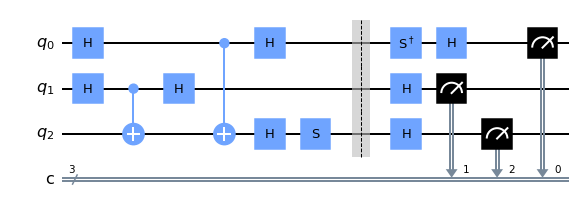

In [332]:
circuits[0].draw(output='mpl')

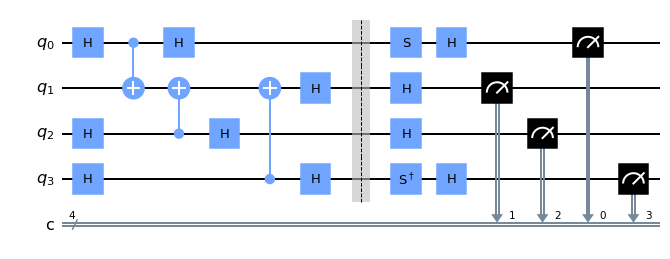

In [333]:
circuits2[0].draw(output='mpl')

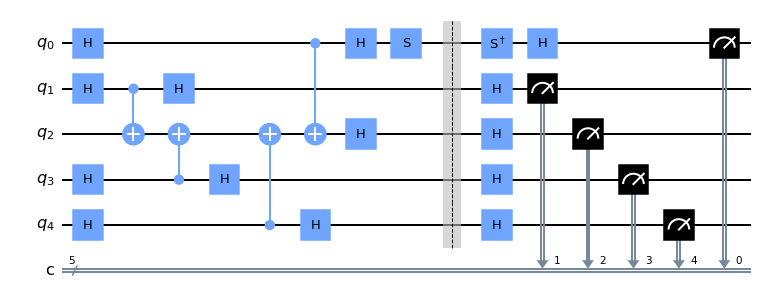

In [334]:
circuits3[0].draw(output='mpl')

In [357]:
def device_run(device,shots,circuits):
    transpiled_circuits = transpile(circuits, device)
    job_real = device.run(transpiled_circuits, shots=shots)
    job_monitor(job_real)
    result_real = job_real.result()

    counts = []
    for i in circuits:
        counts.append(result_real.get_counts(i))
    return counts


In [408]:
def ideal_run(circuits,shots):
    sim = Aer.get_backend('aer_simulator')
    result_ideal = sim.run(circuits,shots=shots).result()
    ideal_counts=[]
    for i in circuits:
        ideal_counts.append(result_ideal.get_counts(i))
    return ideal_counts



In [412]:
def expectation(counts,shots,states):
    Exp=[]
    for i in range(len(counts)):
        probs = 0
        for output in states:
            num = sum(int(i) for i in output)
            if output in counts[i]:
                if(num % 2 == 0):
                    probs += counts[i][output]/shots
                else:
                    probs -= counts[i][output]/shots
            else:
                probs += 0
        Exp.append(probs)
    return Exp



In [415]:
shots=16384
ideal3 = ideal_run(circuits,shots)
exp3 = expectation(ideal3,shots,states_three)
ideal4 = ideal_run(circuits2,shots)
exp4 = expectation(ideal4,shots,states_four)
ideal5 = ideal_run(circuits3,shots)
exp5 = expectation(ideal5,shots,states_five)


In [416]:
total_exp3 = exp3[0]+exp3[1]+exp3[2]-exp3[3]
total_exp4 = exp4[0]+exp4[1]+exp4[2]+exp4[3]-exp4[4]-exp4[5]-exp4[6]-exp4[7]
total_exp5 = exp5[0]+exp5[1]+exp5[2]+exp5[3]+exp5[4]-exp5[5]-exp5[6]-exp5[7]-exp5[8]-exp5[9]-exp5[10]-exp5[11]-exp5[12]-exp5[13]-exp5[14]+exp5[15]
print('ideal expectation value for three qubits ',total_exp3)
print('ideal expectation value for four qubits ',total_exp4)
print('ideal expectation value for five qubits ',total_exp5)

ideal expectation value for three qubits  4.0
ideal expectation value for four qubits  8.0
ideal expectation value for five qubits  16.0


In [323]:
shots=16384
real3 = device_run(quito,shots,circuits)
r_exp3 = expectation(real3,shots,states_three)
real4 = device_run(quito,shots,circuits2)
r_exp4 = expectation(real4,shots,states_four)
real5 = device_run(quito,shots,circuits3)
r_exp5 = expectation(real5,shots,states_five)

Job Status: job has successfully run


KeyboardInterrupt: 

In [ ]:
total_rexp3 = r_exp3[0]+r_exp3[1]+r_exp3[2]-r_exp3[3]
total_rexp4 = r_exp4[0]+r_exp4[1]+r_exp4[2]+r_exp4[3]-r_exp4[4]-r_exp4[5]-r_exp4[6]-r_exp4[7]
total_rexp5 = r_exp5[0]+r_exp5[1]+r_exp5[2]+r_exp5[3]+r_exp5[4]-r_exp5[5]-r_exp5[6]-r_exp5[7]-r_exp5[8]-r_exp5[9]-r_exp5[10]-r_exp5[11]-r_exp5[12]-r_exp5[13]-r_exp5[14]+r_exp5[15]
print('expectation value for three qubits ',total_rexp3)
print('expectation value for four qubits ',total_rexp4)
print('expectation value for five qubits ',total_rexp5)